In [1]:
import statsmodels.api as sm
import pandas as pd

In [2]:
data = pd.read_csv('E:\Data For Training\Diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Plas    768 non-null    object 
 1   Pres    768 non-null    object 
 2   skin    768 non-null    int64  
 3   test    768 non-null    int64  
 4   mass    768 non-null    float64
 5   pedi    768 non-null    float64
 6   age     768 non-null    int64  
 7   class   768 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 48.1+ KB


In [4]:
data.head()

Plas Pres  skin  test  mass   pedi  age  class
0  148   72    35     0  33.6  0.627   50      1
1   85   66    29     0  26.6  0.351   31      0
2  183   64     0     0  23.3  0.672   32      1
3   89   66    23    94  28.1  0.167   21      0
4  137   40    35   168  43.1  2.288   33      1

In [5]:
data.isnull().sum()

Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
import numpy as np

In [7]:
import re                                                                # regex : regular expressions

miss_data = data.replace(r'[^0-9]', np.nan, regex = True)

In [8]:
miss_data.isnull().sum()

Plas     25
Pres     18
skin      0
test      0
mass      0
pedi      0
age       0
class     0
dtype: int64

In [9]:
for i in ['Plas', 'Pres']:
    miss_data[i] = miss_data[i].astype('float64')

In [10]:
miss_data.describe()

Plas        Pres        skin        test        mass        pedi  \
count  743.000000  750.000000  768.000000  768.000000  768.000000  768.000000   
mean   120.858681   69.108000   20.536458   79.799479   31.992578    0.471876   
std     31.914647   19.331078   15.952218  115.244002    7.884160    0.331329   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.078000   
25%     99.000000   62.000000    0.000000    0.000000   27.300000    0.243750   
50%    117.000000   72.000000   23.000000   30.500000   32.000000    0.372500   
75%    140.000000   80.000000   32.000000  127.250000   36.600000    0.626250   
max    199.000000  122.000000   99.000000  846.000000   67.100000    2.420000   

              age       class  
count  768.000000  768.000000  
mean    33.240885    0.348958  
std     11.760232    0.476951  
min     21.000000    0.000000  
25%     24.000000    0.000000  
50%     29.000000    0.000000  
75%     41.000000    1.000000  
max     81.000000    1.000000

In [11]:
for i in miss_data.drop('class', axis = 1).columns:
    miss_data[i] = np.where(miss_data[i] == 0, np.nan, miss_data[i])

In [12]:
miss_data.isnull().sum()

Plas      30
Pres      52
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
## Splitting Original Data

X = miss_data.drop('class',axis=1)     
Y = miss_data['class']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state=1)    # stratify = Y


x_train.head()

Plas  Pres  skin   test  mass   pedi   age
216  109.0  62.0  41.0  129.0  35.8  0.514  25.0
556   97.0  70.0  40.0    NaN  38.1  0.218  30.0
540  100.0  74.0  40.0  215.0  39.4  0.661  43.0
697   99.0   NaN   NaN    NaN  25.0  0.253  22.0
340  130.0  70.0  13.0  105.0  25.9  0.472  22.0

In [15]:
y_train.value_counts()

0    350
1    187
Name: class, dtype: int64

In [16]:
y_train.value_counts(normalize = True)

0    0.651769
1    0.348231
Name: class, dtype: float64

In [17]:
y_train[:5]

216    1
556    0
540    1
697    0
340    0
Name: class, dtype: int64

In [18]:
y_test.value_counts()

0    150
1     81
Name: class, dtype: int64

In [19]:
y_test[:5]

397    1
247    0
161    0
585    0
552    0
Name: class, dtype: int64

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
impute_1 = SimpleImputer(strategy = "mean")

In [22]:
x_train = impute_1.fit_transform(x_train)                                   # implement the strategy

type(x_train)


numpy.ndarray

In [23]:
x_train = pd.DataFrame(x_train)  
x_train.isnull().sum()


0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [24]:
x_train.columns = X.columns

x_train.isnull().sum()

Plas    0
Pres    0
skin    0
test    0
mass    0
pedi    0
age     0
dtype: int64

In [25]:
x_train.head()

Plas      Pres       skin        test  mass   pedi   age
0  109.0  62.00000  41.000000  129.000000  35.8  0.514  25.0
1   97.0  70.00000  40.000000  151.421053  38.1  0.218  30.0
2  100.0  74.00000  40.000000  215.000000  39.4  0.661  43.0
3   99.0  71.80198  29.174142  151.421053  25.0  0.253  22.0
4  130.0  70.00000  13.000000  105.000000  25.9  0.472  22.0

In [26]:
x_test = impute_1.transform(x_test)                                   # implement the strategy

  
x_test = pd.DataFrame(x_test)  

x_test.columns = X.columns

x_test.isnull().sum()

Plas    0
Pres    0
skin    0
test    0
mass    0
pedi    0
age     0
dtype: int64

In [27]:
x_test.head()

Plas  Pres       skin        test  mass   pedi   age
0  131.0  66.0  40.000000  151.421053  34.3  0.196  22.0
1  165.0  90.0  33.000000  680.000000  52.3  0.427  23.0
2  102.0  74.0  40.000000  105.000000  37.2  0.204  45.0
3   93.0  56.0  11.000000  151.421053  22.5  0.417  22.0
4  114.0  88.0  29.174142  151.421053  27.8  0.247  66.0

In [28]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.head()

index  class
0    216      1
1    556      0
2    540      1
3    697      0
4    340      0

In [29]:
y_train = y_train['class']

In [30]:
import copy 

from sklearn.model_selection import train_test_split

from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [31]:
# building the model and fitting the data

log_reg = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.582658
         Iterations 5


In [32]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      530
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                 0.09853
Time:                        00:25:09   Log-Likelihood:                -312.89
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 8.704e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Plas           0.0216      0.004      5.635      0.000       0.014       0.029
Pres          -0.0620      0.008     -7.289      0.000      -0.079      -0.045
skin          -0.0076      0.013     -0.565      0.5

In [34]:
train_data = pd.concat([x_train, y_train], axis = 1)

In [35]:
train_data.groupby('class')['Pres'].mean()

class
0    70.320679
1    74.574469
Name: Pres, dtype: float64

In [36]:
train_data.groupby('class')['Plas'].mean()

class
0    111.028062
1    143.159018
Name: Plas, dtype: float64

In [37]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index()
y_test = y_test['class']

In [38]:
y_pred = log_reg.predict(x_test)

In [39]:
y_pred[:5]

0    0.379334
1    0.364545
2    0.253009
3    0.377623
4    0.232160
dtype: float64

In [40]:
pred = list(map(round, y_pred))

In [41]:
pred[:5]

[0, 0, 0, 0, 0]

In [42]:
print(classification_report(y_test, pred , digits=2))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       150
           1       0.61      0.28      0.39        81

    accuracy                           0.68       231
   macro avg       0.65      0.59      0.59       231
weighted avg       0.67      0.68      0.65       231



### Scikit Learn 

- Logistic
- SVM
- KNN

### Libraries

In [43]:
import warnings
warnings.filterwarnings("ignore")
                                                      
import seaborn as sns                                                   
import matplotlib.pyplot as plt                                         

sns.set(color_codes=True)
%matplotlib inline
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix



Bad key "text.kerning_factor" on line 4 in
C:\Users\kaust\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [45]:
xtrainsc = scaler.fit_transform(x_train)
xtestsc = scaler.transform(x_test)

### Model Instantaniation

In [46]:
#### logit, knn, svm

knn_model          =       KNeighborsClassifier()

logit_model         =      LogisticRegression()


svm_model         =         svm.SVC(random_state = 0)

### Hyper-Parameters

In [47]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [48]:
logit_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [49]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Model Train and Validate

In [50]:
for model in [knn_model, logit_model, svm_model]:
    model.fit(xtrainsc, y_train)
    
    y_pred = model.predict(xtestsc)
    
    print("The Accuracy Score For", str(model), "Model Is :  ",   
      accuracy_score(y_test, y_pred))
    print(" ")
    
    conf_matrix = confusion_matrix(y_test, y_pred , labels=[0, 1])
    
    df_cmatrix = pd.DataFrame(conf_matrix, index = [i for i in [0, 1]],
                  columns = [i for i in ["Healthy","Diabetes"]])
    
    fig_cmatrix = px.imshow(df_cmatrix , title = "Confusion Matrix for " + str(model) + "model :")
    
    fig_cmatrix.show()
    print(" ")
    
    print("Title : The Classification Report for ", str(model), "Model: \n  ",
          classification_report(y_test, y_pred , digits=2))
    print(" ")
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print("The roc_auc score for ", str(model), "Model:  ", roc_auc)
    print(" ")
    
    

The Accuracy Score For KNeighborsClassifier() Model Is :   0.7402597402597403
 


 
Title : The Classification Report for  KNeighborsClassifier() Model: 
                 precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

 
The roc_auc score for  KNeighborsClassifier() Model:   0.7034567901234567
 
The Accuracy Score For LogisticRegression() Model Is :   0.7445887445887446
 


 
Title : The Classification Report for  LogisticRegression() Model: 
                 precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.48      0.57        81

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.74      0.73       231

 
The roc_auc score for  LogisticRegression() Model:   0.6840740740740741
 
The Accuracy Score For SVC(random_state=0) Model Is :   0.7532467532467533
 


 
Title : The Classification Report for  SVC(random_state=0) Model: 
                 precision    recall  f1-score   support

           0       0.76      0.90      0.83       150
           1       0.72      0.48      0.58        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231

 
The roc_auc score for  SVC(random_state=0) Model:   0.6907407407407407
 


### Threshold Management

In [52]:
y_test[:10]

0    1
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    1
9    0
Name: class, dtype: int64

In [53]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [54]:
# store the predicted probabilities for diabetic class for all records... 


y_pred_prob = logit_model.predict_proba(xtestsc)[:, 1]

In [55]:
# print the first 10 predicted probabilities

y_pred_prob[0:10]

array([0.2981223 , 0.88196124, 0.28591652, 0.06690925, 0.37012653,
       0.14778099, 0.76724077, 0.32942292, 0.45072452, 0.12210546])

In [56]:
# predict diabetes if the predicted probability is greater than 0.7

from sklearn.preprocessing import binarize

y_pred_class = binarize([y_pred_prob], 0.20)[0]  # deciding the class of the 1st 10 records based on new threshold

In [57]:
# print the first 10 predicted class

y_pred_class[0:10]

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 0.])

In [58]:
print(classification_report(y_test, y_pred_class , digits=2))

              precision    recall  f1-score   support

           0       0.93      0.49      0.64       150
           1       0.50      0.93      0.65        81

    accuracy                           0.65       231
   macro avg       0.71      0.71      0.65       231
weighted avg       0.77      0.65      0.64       231



In [59]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_class)
    
roc_auc = auc(false_positive_rate, true_positive_rate)
    
print("The roc_auc score after threhold management:  ", roc_auc)
   

The roc_auc score after threhold management:   0.7096296296296296


### Data Visualization

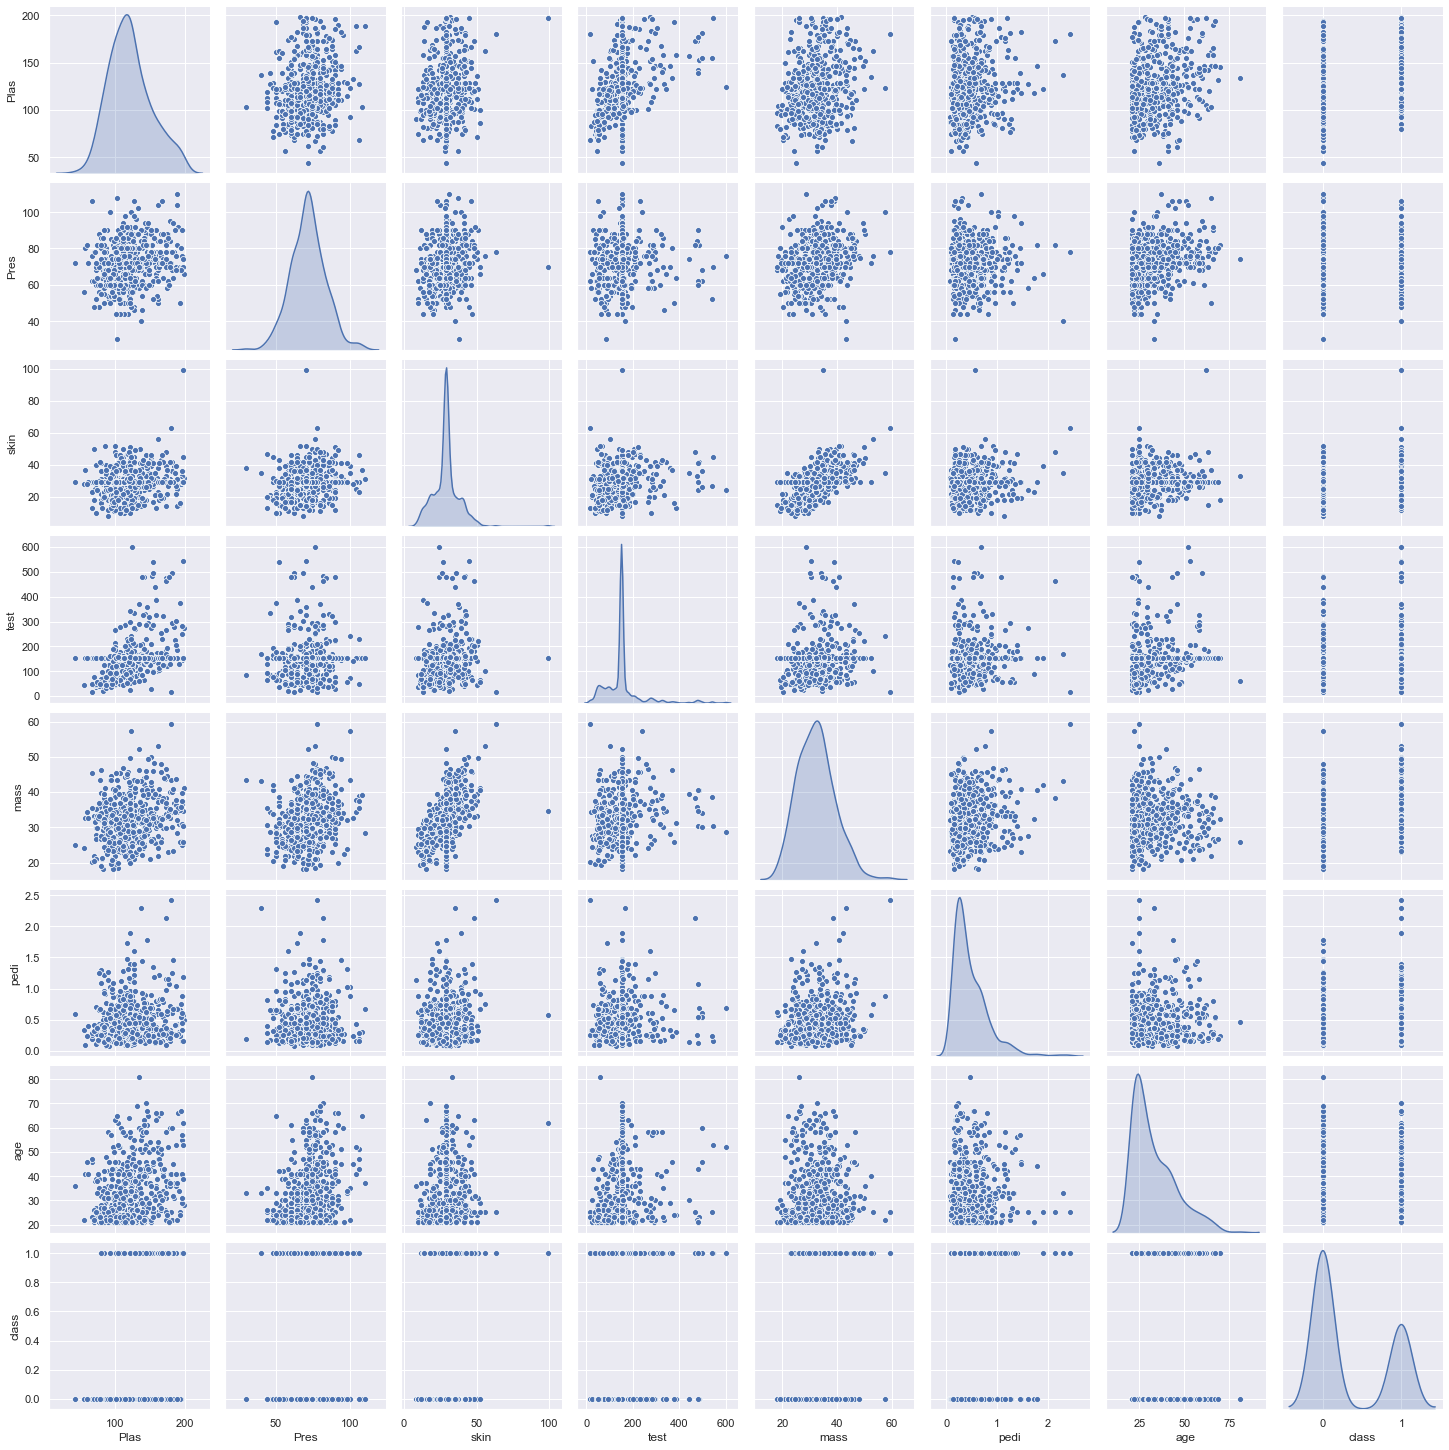

In [60]:
sns.pairplot(train_data, diag_kind = "kde")